**Créé par Gaël AHOUANVOEDO**

**🚀 Dogecoin 📊 Kaggle 📈**

**29 juillet 2022**

# **<center><span style="color:#fd7b12;">🚀 DOGECOIN 🚀 </span></center>**
## <center>Pour plus d'informations, vous pouvez me contacter sur LinkedIn👍</center>

# **<span style="color:#fd7b12;">Table des matières</span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Prediction](#5)
- [6. Conclusion](#6)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### Dans ce projet, je suis emmené à analyser et créer un système de prédiction pour le dogecoin

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

In [2]:
data= pd.read_csv('dogecoin.csv', parse_dates=['Date'], index_col='Date')
df = data.copy()

In [3]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-17,0.002819,0.003177,0.002772,0.003030,0.003030,41838001.0
2019-09-26,0.002202,0.002229,0.002076,0.002155,0.002155,46965571.0
2018-11-24,0.002364,0.002390,0.002194,0.002224,0.002224,11318100.0
2020-10-25,0.002645,0.002676,0.002624,0.002653,0.002653,58532388.0
2019-06-22,0.003229,0.003354,0.003185,0.003279,0.003279,57373528.0


### Tout d'abord, nous examinons le nombre de lignes et de colonnes que nous avons

In [4]:
df.shape

(1723, 6)

### Et qu'en est-il des valeurs manquantes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1723 entries, 2017-11-09 to 2022-07-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1722 non-null   float64
 1   High       1722 non-null   float64
 2   Low        1722 non-null   float64
 3   Close      1722 non-null   float64
 4   Adj Close  1722 non-null   float64
 5   Volume     1722 non-null   float64
dtypes: float64(6)
memory usage: 94.2 KB


### Il semble que nous ayons des valeurs manquantes, nous pouvons vérifier cela avec une autre fonction

In [6]:
df.isnull().sum().sum()

6

### On va identifier ces valeurs

In [7]:
df[df.isna().any(axis=1) == True]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-27,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-24,0.068116,0.068854,0.067589,0.067724,0.067724,369141492.0
2022-07-25,0.067716,0.067880,0.062306,0.062306,0.062306,448572441.0
2022-07-26,0.062319,0.062512,0.060425,0.062512,0.062512,416488015.0
2022-07-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-28,0.067013,0.067198,0.065971,0.066534,0.066534,545875968.0


### On constate que les données du 27/07 sont absentes mais celles du 28/07 sont présente. Soit on remplace la valeur du 27 par la valeur précédente, celle du 26 ou soit on supprime les lignes des dates de 27 et 28. Je pense que la première idée est la plus appropriée

In [9]:
df.fillna(method='bfill',inplace=True)
df.isnull().sum().sum()

0

### Nous allons créer une moyenne mobile pour une meilleure visualisation dans l'EDA

In [10]:
avg_num = 10
df['rolling_price'] = df['Close'].rolling(window = avg_num ).mean()

In [11]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,rolling_price
Date,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0,NaN
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0,NaN
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0,NaN
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0,NaN
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0,NaN
2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340.0,NaN
2017-11-15,0.001189,0.001351,0.001179,0.001339,0.001339,2840180.0,NaN
2017-11-16,0.001348,0.001424,0.001286,0.001390,0.001390,3423010.0,NaN
2017-11-17,0.001381,0.001394,0.001274,0.001313,0.001313,2787480.0,NaN


### Et on stock notre nouveau dataset

In [12]:
df.to_csv('dataset.csv', index=False)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

### Définir des valeurs de style pour toutes nos visualisations

In [13]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

### `Quel est l'évolution du Dogecoin au cours des années ?`

### Pour faire une bonne analyse nous considérerons juste la moyenne mobile

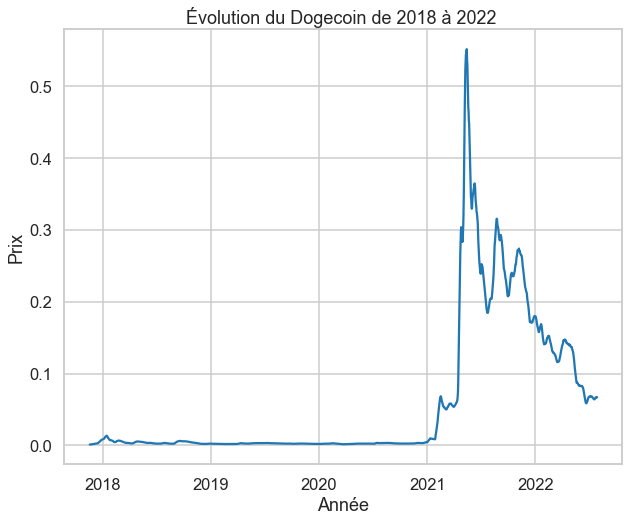

In [14]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df.index, y=df.rolling_price, palette=colors)
plt.title('Évolution du Dogecoin de 2018 à 2022 ')
plt.xlabel('Année')
plt.ylabel('Prix')
plt.show()

> ### On conctate que de 2018 à 2020, la courbe d'évolution du dogecoin était stable. Mais à partir de 2021, il a connu un boom impressionnat passant de 0.0045 à 0.5. Il a pris, 100x plus de valeurs. En consultant sur Internet, on remarque que celà est lié a l'influence de Elon Musk sur les prix du marché. Nous ferons une étude beaucoup plus en profondeur sur cette période. Aussi, courant 2021, le prix du dogecoin a atteint son ATH. 

### Créons de nouvelles variables pour faciliter nos recherches

In [15]:
df['Year']=df.index.year
df['Month']=df.index.month
df['Day']=df.index.day
df['Day_name'] = df.index.day_name()

In [16]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume,rolling_price,Year,Month,Day,Day_name
Date,,,,,,,,,,,
2021-04-03,0.057658,0.059484,0.055804,0.055804,0.055804,1.136931e+09,0.055054,2021,4,3,Saturday
2019-04-06,0.003594,0.003594,0.003415,0.003439,0.003439,4.634381e+07,0.002747,2019,4,6,Saturday
2020-04-08,0.001986,0.002044,0.001960,0.002012,0.002012,1.162834e+08,0.001898,2020,4,8,Wednesday
2019-07-27,0.002923,0.003030,0.002797,0.002823,0.002823,2.090118e+07,0.002983,2019,7,27,Saturday
2019-12-30,0.002070,0.002077,0.002043,0.002054,0.002054,7.317119e+07,0.002073,2019,12,30,Monday


### Faisons un encodage des mois

In [17]:
df.Month.replace({1:'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr',
                5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume,rolling_price,Year,Month,Day,Day_name
Date,,,,,,,,,,,
2022-07-05,0.069431,0.069841,0.065697,0.067155,0.067155,4.032207e+08,0.068361,2022,Jul,5,Tuesday
2019-09-24,0.002489,0.002502,0.002077,0.002228,0.002228,5.604835e+07,0.002551,2019,Sep,24,Tuesday
2021-07-16,0.185238,0.188322,0.171612,0.172345,0.172345,1.144730e+09,0.204397,2021,Jul,16,Friday
2020-01-28,0.002365,0.002450,0.002363,0.002450,0.002450,9.152877e+07,0.002340,2020,Jan,28,Tuesday
2020-03-10,0.002217,0.002263,0.002166,0.002207,0.002207,1.154316e+08,0.002354,2020,Mar,10,Tuesday


### Commençons maintenant notre analyse en profondeur en démarrant par 2020

In [18]:
df_2020 = df.query('Year==2020')
df_2020.sample(5)

,Open,High,Low,Close,Adj Close,Volume,rolling_price,Year,Month,Day,Day_name
Date,,,,,,,,,,,
2020-10-07,0.002593,0.002612,0.002565,0.002595,0.002595,125523508.0,0.002622,2020,Oct,7,Wednesday
2020-12-02,0.003335,0.003436,0.003293,0.003374,0.003374,58705661.0,0.003522,2020,Dec,2,Wednesday
2020-08-23,0.003438,0.003453,0.003388,0.003414,0.003414,39485548.0,0.003486,2020,Aug,23,Sunday
2020-01-29,0.002451,0.002471,0.002390,0.002390,0.002390,80676219.0,0.002339,2020,Jan,29,Wednesday
2020-09-25,0.002628,0.002721,0.002616,0.002698,0.002698,124575712.0,0.002719,2020,Sep,25,Friday


Text(0, 0.5, 'Prix')

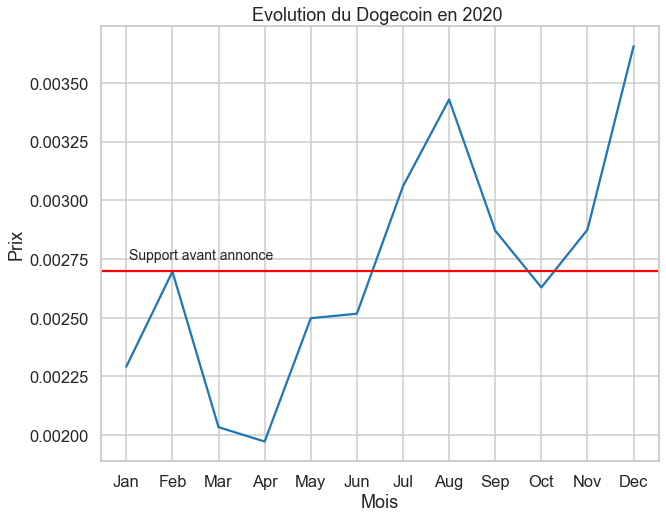

In [19]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_2020.Month, y=df_2020.rolling_price, palette=colors, ci=None)
plt.axhline(0.00270, c='r')
plt.annotate('Support avant annonce', xy=(0.05, 0.00275),fontsize=14)
plt.title('Evolution du Dogecoin en 2020 ')
plt.xlabel('Mois')
plt.ylabel('Prix')

> ### Effectivement, c'est la communication de Elon Musk, qui a fait que en Juin, le prix du dogecoin est monté jusqu'à un pic de +0.00350 en 2020.

### Observons maintenant comment cette évolution a perduré en 2021

In [20]:
df_2021 = df.query('Year==2021')
df_2021.sample(5)

,Open,High,Low,Close,Adj Close,Volume,rolling_price,Year,Month,Day,Day_name
Date,,,,,,,,,,,
2021-09-16,0.247542,0.247733,0.233852,0.242555,0.242555,1.140048e+09,0.246235,2021,Sep,16,Thursday
2021-06-13,0.312485,0.330026,0.307892,0.324382,0.324382,1.484851e+09,0.340455,2021,Jun,13,Sunday
2021-10-03,0.218811,0.226228,0.215872,0.221748,0.221748,1.070268e+09,0.208713,2021,Oct,3,Sunday
2021-05-17,0.513413,0.515221,0.458551,0.487892,0.487892,7.330831e+09,0.509782,2021,May,17,Monday
2021-04-12,0.074544,0.074986,0.068889,0.070767,0.070767,2.687720e+09,0.062880,2021,Apr,12,Monday


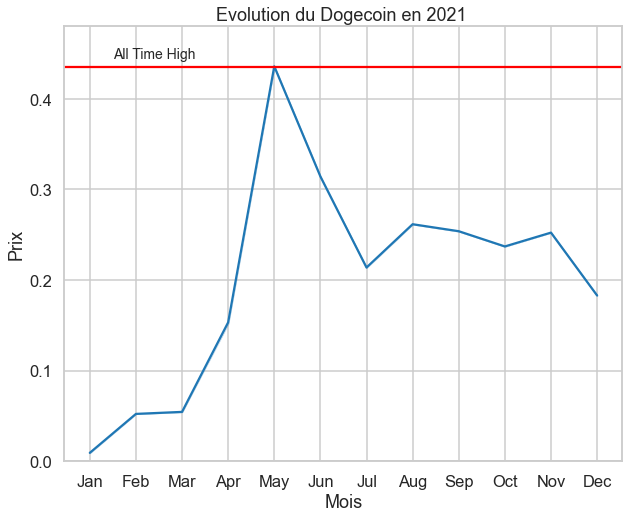

In [21]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_2021.Month, y=df_2021.rolling_price, palette=colors,ci=False)
plt.title('Evolution du Dogecoin en 2021 ')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.axhline(0.435, c='r')
plt.ylim(0,0.48)
plt.annotate('All Time High',xy=(0.5,0.445),fontsize=14)
plt.show()

> ### Le prix a continué a évoluer jusqu'en Mai 2021 avant de retomber tout le reste de l'année sans jamais remonter au support situé a 0.4

### Et en 2022?

In [22]:
df_2022 = df.query('Year==2022')
df_2022.sample(5)

,Open,High,Low,Close,Adj Close,Volume,rolling_price,Year,Month,Day,Day_name
Date,,,,,,,,,,,
2022-07-03,0.066698,0.067356,0.065111,0.067179,0.067179,2.808782e+08,0.068261,2022,Jul,3,Sunday
2022-06-24,0.064019,0.068162,0.064004,0.067124,0.067124,5.147294e+08,0.060705,2022,Jun,24,Friday
2022-05-18,0.090221,0.090797,0.083649,0.083649,0.083649,5.582578e+08,0.091323,2022,May,18,Wednesday
2022-02-13,0.144379,0.157354,0.144031,0.148948,0.148948,1.581065e+09,0.152161,2022,Feb,13,Sunday
2022-02-28,0.123118,0.134479,0.121954,0.133156,0.133156,7.657559e+08,0.130127,2022,Feb,28,Monday


Text(0, 0.5, 'Prix')

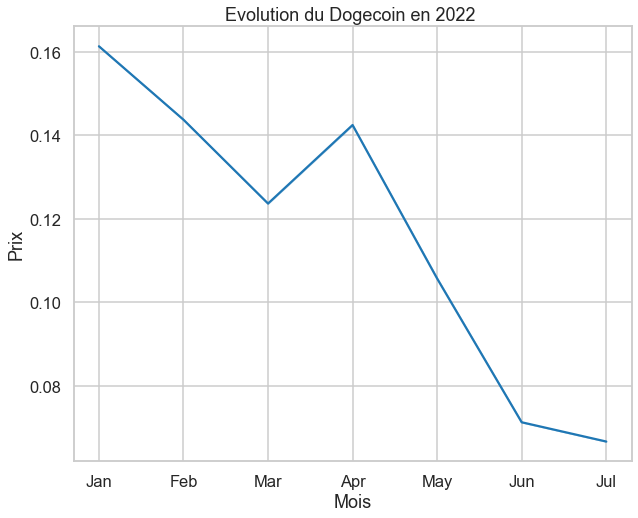

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_2022.Month, y=df_2022.rolling_price, palette=colors, ci=False)
plt.title('Evolution du Dogecoin en 2022 ')
plt.xlabel('Mois')
plt.ylabel('Prix')

> ### Et le prix continue par décroitre.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;">Conclusion </span></center>**

### `Quel est l'évolution du Dogecoin au cours des années ?`

> ### De 2018 à 2020, la courbe d'évolution du dogecoin était stable. Mais à partir de 2021, il a connu un boom impressionnat passant de 0.0045 à 0.5. Il a pris, 100x plus de valeurs. En consultant sur Internet, on remarque que celà est lié a l'influence de Elon Musk sur le prix du marché en Juin 2020. Ce boom a conduit le Dogecoin jusqu'à son ATH en fin Mai 2021 avant de reperdre de la valeur d'une manière très importante, -40%.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>